In [1]:
# install tensorflow the last version

!pip install tensorflow==2.2.0rc0

     |████████████████████████████████| 515.9MB 62kB/s s eta 0:00:01██▊                         | 108.4MB 42.9MB/s eta 0:00:10     |████████████████████▋           | 332.0MB 36.5MB/s eta 0:00:06     |█████████████████████           | 336.9MB 36.5MB/s eta 0:00:05     |█████████████████████▎          | 343.5MB 36.5MB/s eta 0:00:05:00:09�████████████       | 403.9MB 38.7MB/s eta 0:00:03     |███████████████████████████▉    | 448.7MB 41.9MB/s eta 0:00:02     |████████████████████████████    | 451.6MB 41.9MB/s eta 0:00:02��██████████████▎   | 455.9MB 41.9MB/s eta 0:00:02��███████████████▏| 503.1MB 43.3MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 43.9MB/s eta 0:00:01�█████▋                      | 7.8MB 35.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 23.9MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 37.8MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 40.3MB/s eta 0:00:01 eta 0:00:01
     |████████████████████████████████| 20

     |████████████████████████████████| 153kB 37.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 19.0MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: tensorboard 2.1.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.16.1 which is incompatible.
ERROR: tensorboard 2.1.1 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
  Found existing installation: scipy 1.2.0
    Uninstalling scipy-1.2.0:
      Successfully uninstalled scipy-1.2.0
  Found existing installation: protobuf 3.6.1
    Uninstalling protobuf-3.6.1:
      Successfully uninstalled protobuf-3.6.1
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: astunparse 1.6.2
    Uni

In [2]:
# checking a verion of the tensorflow

import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [135]:
# import all needed dependencies

import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

In [4]:
#loading dataset

!wget https://raw.githubusercontent.com/s-kav/IBM-Watsom-capstone-project/master/Temp_England_1723_2019.csv

--2020-06-03 07:58:39--  https://raw.githubusercontent.com/s-kav/IBM-Watsom-capstone-project/master/Temp_England_1723_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28767 (28K) [text/plain]
Saving to: ‘Temp_England_1723_2019.csv’

100%[======================================>] 28,767      --.-K/s   in 0.001s  

2020-06-03 07:58:40 (19.9 MB/s) - ‘Temp_England_1723_2019.csv’ saved [28767/28767]



In [58]:
# !wget https://raw.githubusercontent.com/s-kav/IBM-Watsom-capstone-project/master/Temp_12_col.csv

In [82]:
# reading dataset to pandas dataframe
DS_temp = pd.read_csv('Temp_12_col.csv', sep = ',', parse_dates = True, index_col = "Date", engine = 'python', encoding = 'latin1', names = ['Date', 'Value'])

In [59]:
DS_temp.last_valid_index() # checking the last value

Timestamp('2019-12-01 00:00:00')

In [60]:
DS_temp.dtypes.value_counts() # checking types of data

float64    1
dtype: int64

In [33]:
DS_temp.head() # showing header

,Value
Date,
1723-01-01,1.1
1723-02-01,4.4
1723-03-01,7.5
1723-04-01,8.9
1723-05-01,11.7


In [83]:
DS_temp['Value'].describe() # obtaining promary statistics 

count    3564.000000
mean        9.333946
std         4.748057
min        -3.100000
25%         5.300000
50%         8.965000
75%        13.800000
max        19.261000
Name: Value, dtype: float64

In [61]:
DS_temp.shape # checking dimensinality of dataset

(3564, 1)

In [62]:
DS_temp.columns # checking names of columns

Index(['Value'], dtype='object')

In [11]:
!pip install adtk # install needed package

     |████████████████████████████████| 61kB 6.8MB/s eta 0:00:011


In [ ]:
# Anomaly Detection Toolkit (ADTK) is a Python package for unsupervised / rule-based time series anomaly detection
# License - MPL 2.0
# https://adtk.readthedocs.io/en/stable/quickstart.html

In [73]:
import adtk 
from adtk.visualization import plot
from adtk.data import validate_series
from adtk.detector import SeasonalAD, ThresholdAD, InterQuartileRangeAD, OutlierDetector

In [37]:
DS_temp_tr = validate_series(DS_temp) # validation of dataset

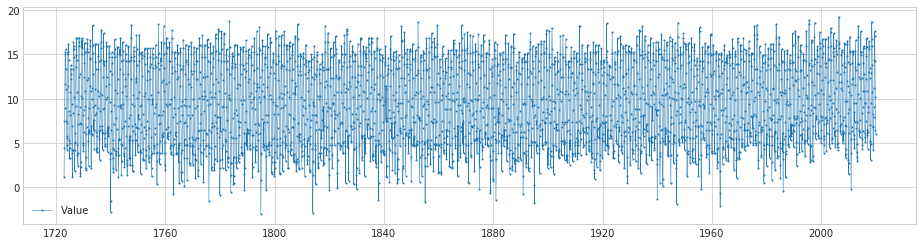

In [38]:
plot(DS_temp) # plotting dataset

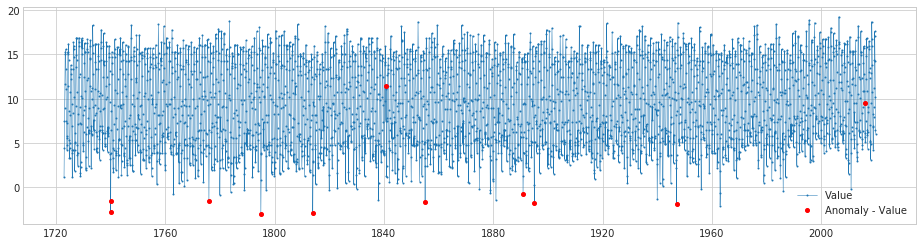

In [54]:
# building model based on our dataset

seasonal_ad = SeasonalAD(freq = 24*7) # select of the Detector from adtk package, timestamp detection is weekly
anomalies = seasonal_ad.fit_detect(DS_temp) # detecting of anomalies
# plotting results of detection, redpoints are showing anomaly dates
plot(DS_temp, anomaly = anomalies, anomaly_color = "red", anomaly_tag = "marker")

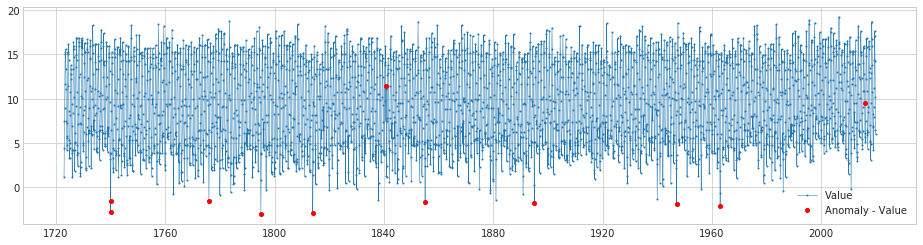

In [53]:
seasonal_ad = SeasonalAD(freq = 24) # timestamp detection is dayly
anomalies = seasonal_ad.fit_detect(DS_temp)
plot(DS_temp, anomaly = anomalies, anomaly_color = "red", anomaly_tag = "marker")

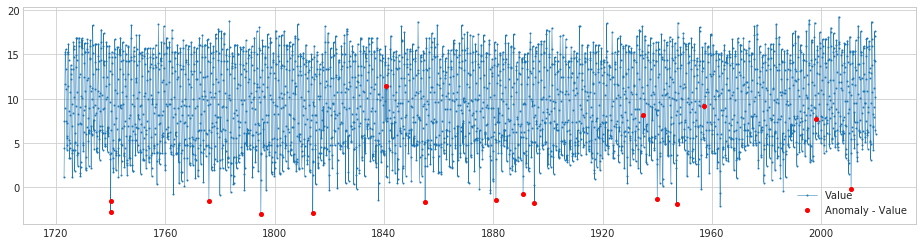

In [55]:
seasonal_ad = SeasonalAD(freq = 24*7*4) # timestamp detection is monthly, it's more rightly, because our dataset has monthly values
anomalies = seasonal_ad.fit_detect(DS_temp)
plot(DS_temp, anomaly = anomalies, anomaly_color = "red", anomaly_tag = "marker")

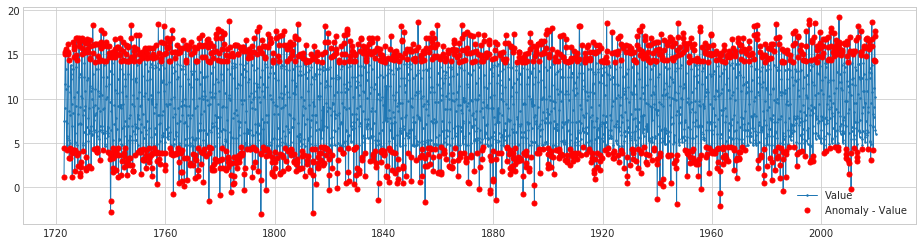

In [65]:
# let's try to use other Detector from adtk package - ThresholdAD which compares each time series value with given thresholds
# our boards for this Detector are: high = mean + std, low = mean - std
threshold_ad = ThresholdAD(high = DS_temp['Value'].mean()+DS_temp['Value'].std(), low = DS_temp['Value'].mean()-DS_temp['Value'].std())
anomalies = threshold_ad.detect(DS_temp)
plot(DS_temp, anomaly = anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

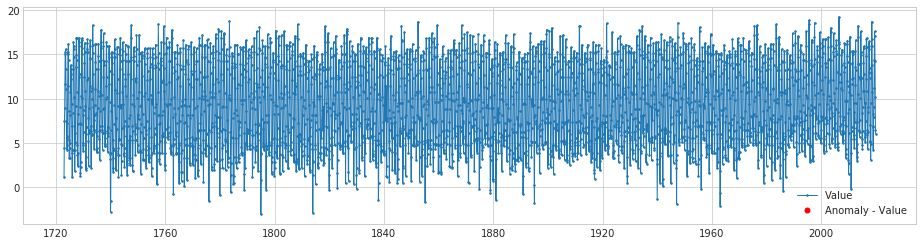

In [68]:
# let's try to use other Detector from adtk package - InterQuartileRangeAD which based on simple historical statistics is based on interquartile range (IQR)
iqr_ad = InterQuartileRangeAD(c = 1.5)
anomalies = iqr_ad.fit_detect(DS_temp)
plot(DS_temp, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

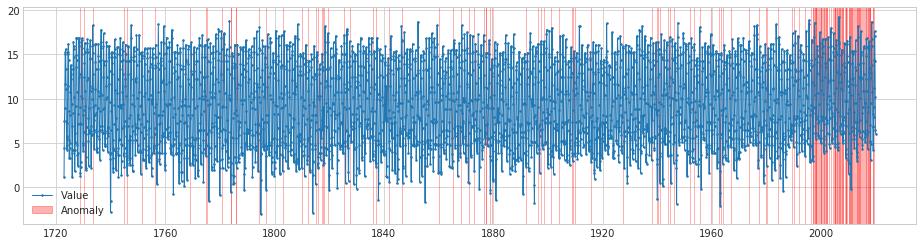

In [76]:
# let's try to use other Detector from adtk package - OutlierDetector which performs multivariate time-independent outlier detection and identifies outliers as anomalies

outlier_detector = OutlierDetector(LocalOutlierFactor(contamination = 0.05))
anomalies = outlier_detector.fit_detect(DS_temp)
plot(DS_temp, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

In [76]:
# Anomaly Detection Using Isolation Forest

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [98]:
model = IsolationForest(behaviour = "new", n_estimators = 50, max_samples = 'auto', contamination = float(0.1), max_features = 1.0)
model.fit(DS_temp[['Value']])

IsolationForest(behaviour='new', bootstrap=False, contamination=0.1,
        max_features=1.0, max_samples='auto', n_estimators=50, n_jobs=None,
        random_state=None, verbose=0)

In [99]:
DS_temp['Scores'] = model.decision_function(DS_temp[['Value']])
DS_temp['Anomaly'] = model.predict(DS_temp[['Value']])
DS_temp.head(10)

,Value,Scores,Anomaly
Date,,,
1723-01-01,1.1,-0.058552,-1
1723-02-01,4.4,0.061514,1
1723-03-01,7.5,0.056223,1
1723-04-01,8.9,0.052308,1
1723-05-01,11.7,0.040193,1
1723-06-01,15.0,0.041673,1
1723-07-01,15.3,0.051039,1
1723-08-01,15.6,0.032339,1
1723-09-01,13.3,0.045876,1


In [100]:
anomaly = DS_temp.loc[DS_temp['Anomaly']==-1]
anomaly_index = list(anomaly.index)
anomaly.head(10)

,Value,Scores,Anomaly
Date,,,
1723-01-01,1.1,-0.058552,-1
1726-01-01,1.1,-0.058552,-1
1726-12-01,1.8,-0.028869,-1
1727-07-01,16.9,-0.018822,-1
1727-08-01,16.9,-0.018822,-1
1728-07-01,16.9,-0.018822,-1
1728-12-01,1.6,-0.037806,-1
1729-01-01,1.2,-0.051411,-1
1729-03-01,2.8,-0.000642,-1


In [101]:
# persent of anomalies
anom_pers = round((len(anomaly['Anomaly']==-1)/len(DS_temp[['Value']]))*100, 3)
anom_pers

10.017

In [ ]:
# Clustering-Based Anomaly Detection

In [102]:
DS_temp.head()

,Value,Scores,Anomaly
Date,,,
1723-01-01,1.1,-0.058552,-1
1723-02-01,4.4,0.061514,1
1723-03-01,7.5,0.056223,1
1723-04-01,8.9,0.052308,1
1723-05-01,11.7,0.040193,1


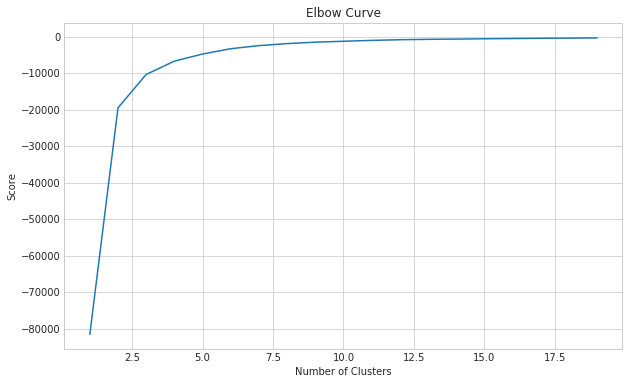

In [112]:
# Before we start k-means clustering, we use elbow method to determine the optimal number of clusters

data = DS_temp[['Value', 'Scores', 'Anomaly']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

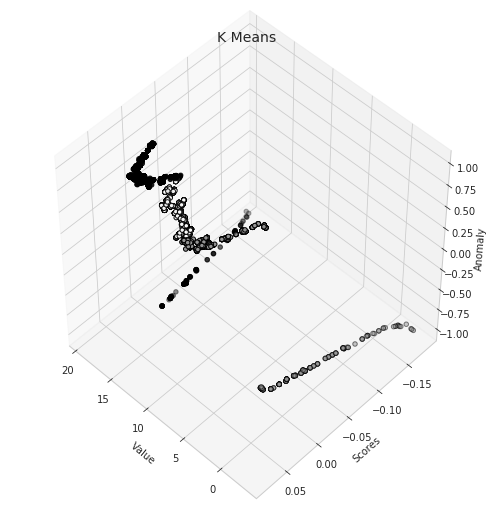

In [116]:
# will set n_clusters = 3, and upon generating the k-means output use the data to plot the 3D clusters

X = DS_temp[['Value', 'Scores', 'Anomaly']]
X = X.reset_index(drop = True)
km = KMeans(n_clusters = 3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize = (7,7))
ax = Axes3D(fig, rect = [0, 0, 0.95, 1], elev = 48, azim = 134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c = labels.astype(np.float), edgecolor = "k")
ax.set_xlabel("Value")
ax.set_ylabel("Scores")
ax.set_zlabel("Anomaly")
plt.title("K Means", fontsize = 14);

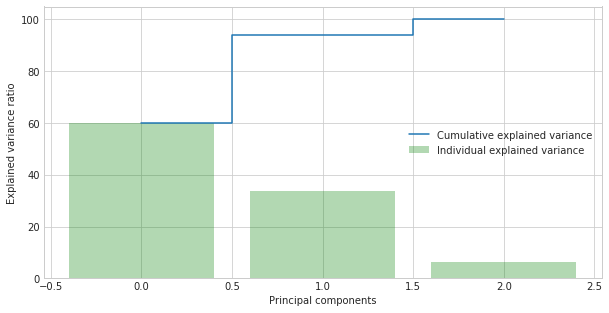

In [119]:
# find out the number of components (features) to keep
data = DS_temp[['Value', 'Scores', 'Anomaly']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis = 0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse = True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize = (10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.3, align = 'center', label = 'Individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show();

The zero component explains 60% of the variance. The first component explains almost 35% of the variance. The second component explains about 6%, it can be really negligible. The first 1 components contain over 90% of the information. So, we will set n_components = 1.

In [128]:
# Support Vector Machine-Based Anomaly Detection

In [138]:
DS_temp.head()

,Value,Scores,Anomaly,Anomaly2
Date,,,,
1723-01-01,1.1,-0.058552,-1,NaN
1723-02-01,4.4,0.061514,1,NaN
1723-03-01,7.5,0.056223,1,NaN
1723-04-01,8.9,0.052308,1,NaN
1723-05-01,11.7,0.040193,1,NaN


In [141]:
anomaly.tail(20)

,Value,Scores,Anomaly
Date,,,
1997-07-01,16.935,-0.023847,-1
1997-08-01,18.602,-0.158632,-1
1999-07-01,17.482,-0.067610,-1
2002-08-01,16.970,-0.021887,-1
2003-07-01,17.487,-0.067610,-1
2003-08-01,18.013,-0.124672,-1
2004-08-01,17.388,-0.057087,-1
2006-07-01,19.261,-0.171877,-1
2010-01-01,1.495,-0.038732,-1


In [ ]:
Conlclusions:
    1. 1723-01-01 (outlier) - https://en.wikipedia.org/wiki/Grey_Lock%27s_War, Massachusetts Governor Samuel Shute officially
        declared war on the Abenaki on July 25, 1722.[3] Shute, who had ongoing political disputes with the Massachusetts assembly,
        abruptly sailed for England on January 1, 1723, leaving Lieutenant Governor William Dummer to manage Massachusetts
        involvement in the war.
    2. 1743-08-01 (outlier) -  https://en.wikipedia.org/wiki/Richard_Savage_(poet), On the night of 10 January 1743, Savage was
        arrested for a debt of eight pounds and confined in the debtors' section of the Bristol Newgate Prison. He died there on
        1 August 1743, probably from liver failure brought on by drinking.
    3. 1997-07-01 (outlier) -  https://en.wikipedia.org/wiki/Handover_of_Hong_Kong, The transfer of sovereignty over Hong Kong,
        commonly known as the handover of Hong Kong (or simply the Handover, also the Return in mainland China), occurred at
        midnight at the start of 1 July 1997, when the United Kingdom ended administration for the colony of Hong Kong and 
        returned control of the territory to China.